# Build curves from Topic 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [3]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [5]:
valuation_date = Date(6, 10, 2001)
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []
spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "3M", 4.2/100.0, depoDCCType, cal_type=cal)
depos.append(depo)

fraDCCType = DayCountTypes.ACT_360
fras = []
fra = IborFRA(settlement_date.add_tenor("3M"), "3M", 4.20/100.0, fraDCCType, cal_type=cal)
fras.append(fra)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_E_360_ISDA
fixedFreqType = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settlement_date, "1Y", swapType, 4.20/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "2Y", swapType, 4.30/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "3Y", swapType, 4.70/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "5Y", swapType, 5.40/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "7Y", swapType, 5.70/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "10Y", swapType, 6.00/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "12Y", swapType, 6.10/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "15Y", swapType, 5.90/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "20Y", swapType, 5.60/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "25Y", swapType, 5.55/100.0, fixedFreqType, fixedDCCType, cal_type=cal)
swaps.append(swap)


## Look at a few standard interpolators

In [6]:
check_refit = True
iborCurves = {}
optional_interp_params = {'sigma' : 5.0} # only relevant for interp_type == InterpTypes.TENSION_ZERO_RATES
# for interp_type in InterpTypes:
for interp_type in [InterpTypes.FLAT_FWD_RATES, InterpTypes.LINEAR_ZERO_RATES,InterpTypes.NATCUBIC_ZERO_RATES]:
    start = timer()
    iborCurve = IborSingleCurve(valuation_date, depos, fras, swaps, interp_type, check_refit=check_refit, **optional_interp_params)
    end = timer()
    print(f'{interp_type} fit took {end-start:.2f} sec')
    iborCurves[interp_type] = iborCurve

InterpTypes.FLAT_FWD_RATES fit took 0.13 sec
InterpTypes.LINEAR_ZERO_RATES fit took 0.11 sec
InterpTypes.NATCUBIC_ZERO_RATES fit took 1.54 sec


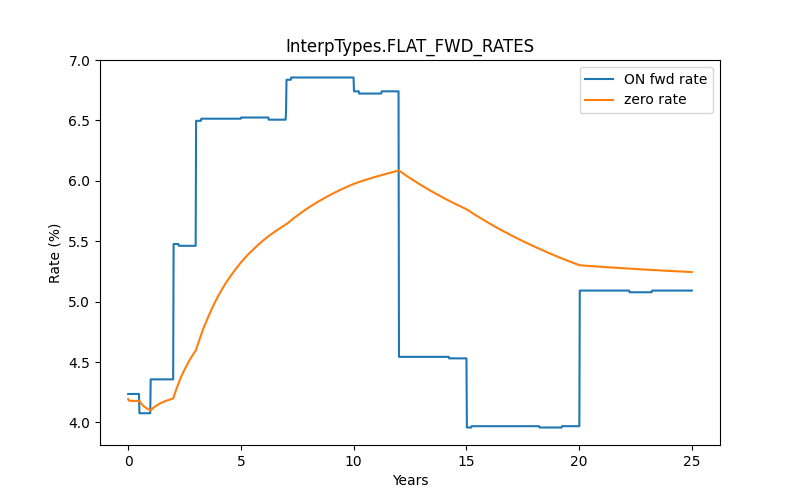

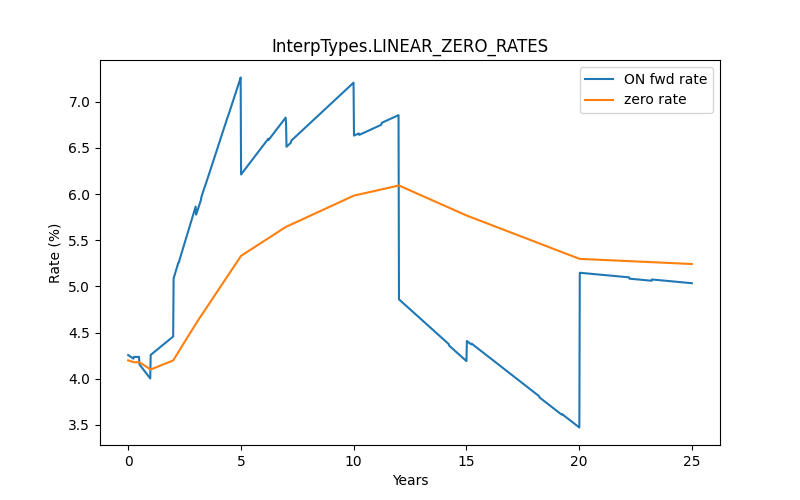

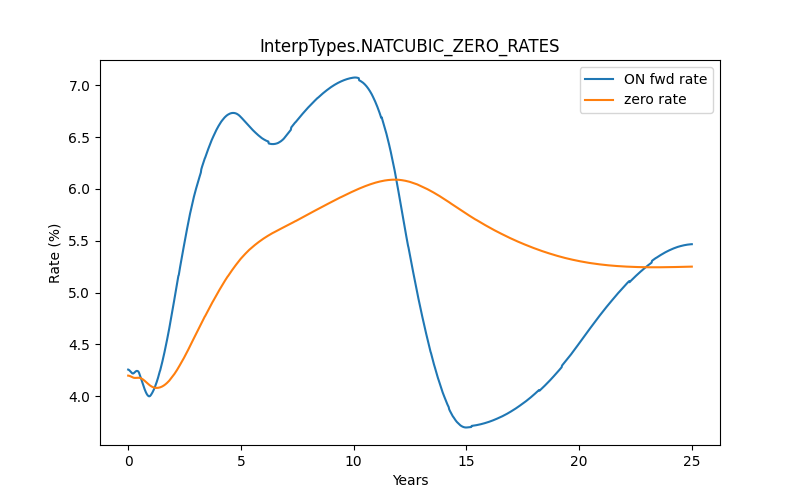

In [7]:
years = np.linspace(1.0/365, 25, int(25*365/7)+1)
plotDates = settlement_date.add_years(years)
%matplotlib widget

for interp_type in iborCurves.keys():

    plt.figure(figsize=(8,5))
    iborCurve = iborCurves[interp_type]
    # iborCurveFwdRate = iborCurve.fwd_rate(plotDates, "1D", DayCountTypes.SIMPLE)
    # want a "true" instantaneous forward rate not day-cunted rolled etc etc 1d fwd rate 
    # iborCurveFwdRate = -np.log(iborCurve._df(years+1.0/365)/iborCurve._df(years))*365
    iborCurveFwdRate =  iborCurve.fwd(plotDates)
    iborCurveZeroRate = iborCurve.zero_rate(plotDates)
#     iborCurveSwapRate = iborCurve.swap_rate(settlement_date, plotDates)
    
    plt.plot(years, iborCurveFwdRate*100.0, label="ON fwd rate")
    plt.plot(years, iborCurveZeroRate*100.0, label="zero rate")
#     plt.plot(years, iborCurveSwapRate*100.0, label="SWAP RATE")

    plt.title(interp_type)
    plt.xlabel("Years")
    plt.ylabel("Rate (%)")
    plt.legend(loc = 'best')

### Look at tension splines with different tensions

In [8]:
check_refit = True
tensionCurves = {}
interp_type = InterpTypes.TENSION_ZERO_RATES
for sigma in [0.1,2.0,10.0]:
    optional_interp_params = {'sigma' : sigma} 
    iborCurve = IborSingleCurve(valuation_date, depos, fras, swaps, interp_type, check_refit=check_refit, **optional_interp_params)
    tensionCurves[sigma] = iborCurve

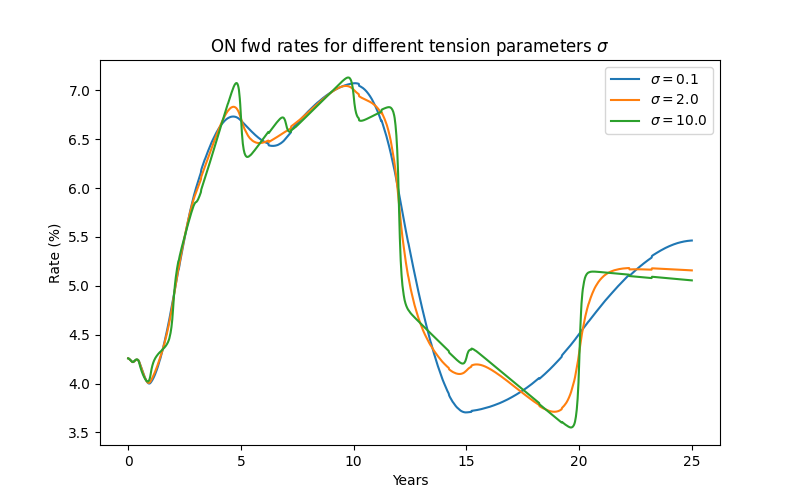

In [9]:
years = np.linspace(1.0/365, 25, int(25*365/7)+1)
plotDates = settlement_date.add_years(years)
%matplotlib widget

plt.figure(figsize=(8,5))
for sigma in tensionCurves.keys():

    iborCurve = tensionCurves[sigma]
    # iborCurveFwdRate = iborCurve.fwd_rate(plotDates, "1D", DayCountTypes.SIMPLE)
    # want a "true" instantaneous forward rate not day-cunted rolled etc etc 1d fwd rate 
    # iborCurveFwdRate = -np.log(iborCurve._df(years+1.0/365)/iborCurve._df(years))*365
    iborCurveFwdRate = iborCurve.fwd(plotDates)
    iborCurveZeroRate = iborCurve.zero_rate(plotDates)
#     iborCurveSwapRate = iborCurve.swap_rate(settlement_date, plotDates)
    
    plt.plot(years, iborCurveFwdRate*100.0, label=f"$\sigma = ${sigma}")

    plt.title('ON fwd rates for different tension parameters $\sigma$')
    plt.xlabel("Years")
    plt.ylabel("Rate (%)")
    plt.legend(loc = 'best')